<a href="https://colab.research.google.com/github/MadeBayuSW/UTS_ML_I-Made-Bayu-S.W/blob/main/I_Made_Bayu_S_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (569, 31)
Class distribution:
1    357
0    212
Name: target, dtype: int64
Accuracy of Decision Tree Classifier: 0.94
Accuracy of Random Forest Classifier: 0.96
Accuracy of Self-Training Classifier: 0.94


/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


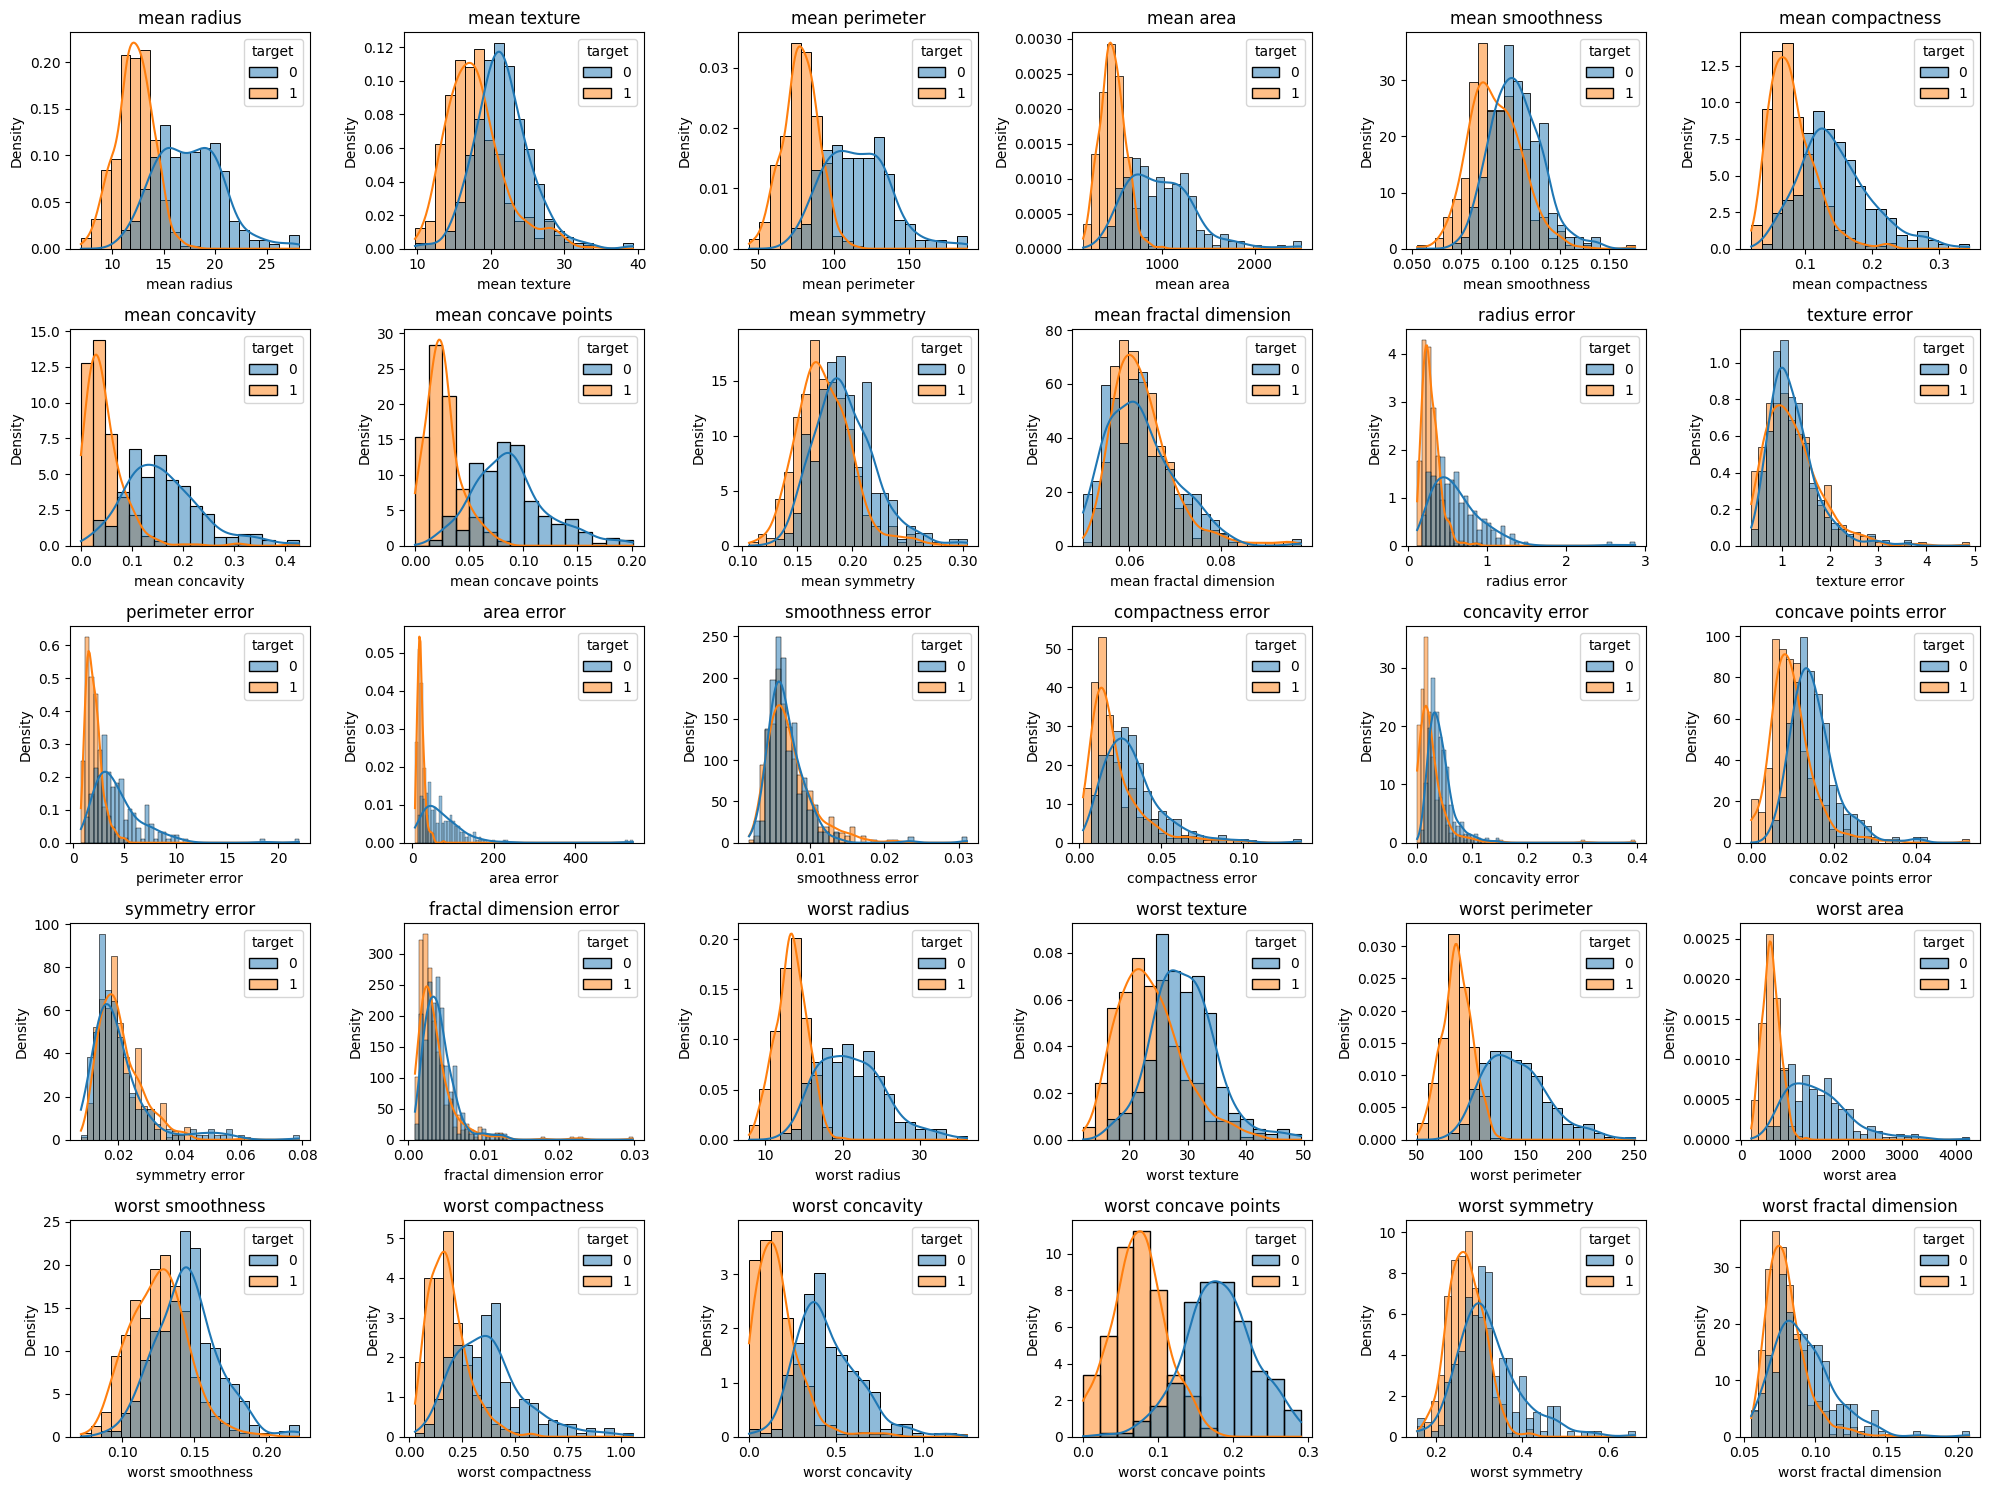

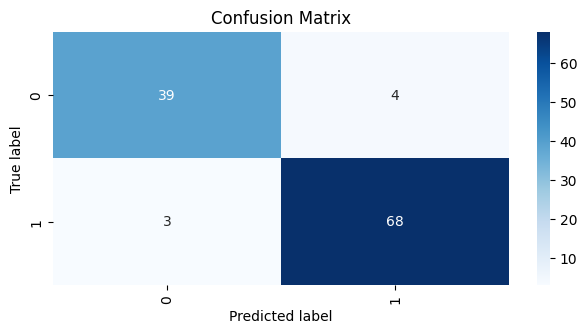

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']  # Add target column

# Print some info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Class distribution:\n{df['target'].value_counts()}")

# Plot histograms of each feature
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):
    ax = axes[i // 6][i % 6]
    sns.histplot(df, x=column, hue='target', ax=ax, kde=True, stat='density', common_norm=False)
    ax.set_title(column)
plt.tight_layout()

# Split data into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {acc:.2f}")

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {acc:.2f}")

# Self-Training
# Set up the base classifier
base_classifier = DecisionTreeClassifier()

# Set up the self-training classifier
self_training = SelfTrainingClassifier(base_classifier, max_iter=50)

# Fit the self-training classifier
self_training.fit(X_train, y_train)

# Predict on the test set
y_pred = self_training.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Self-Training Classifier: {acc:.2f}")

# Plot feature importances for Random Forest Classifier
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
fig, ax = plt.subplots()
ax.bar(range(X.shape[1]), importances[indices])
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels(X.columns[indices], rotation=90)
ax.set_title("Feature importances")
plt.tight_layout()

# Plot confusion matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()
